# Determine the key factors influencing employee resignation and suggest models to help reduce turnover

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
#salut

In [217]:
general_data_off = pd.read_csv('https://raw.githubusercontent.com/equisdel/INDIAI/refs/heads/Mathis/general_data.csv')

In [218]:
general_data = general_data_off.copy()
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


# Uncessary Columns
### Gender for ehtics ?
### MaritalStatus for ethics ?
### Over18 because useless
### EmployeeCount because useless
### StandardHours because useless

In [219]:
# Drop of the previous columns
general_data.drop('Gender', axis=1,inplace=True)
general_data.drop('MaritalStatus', axis=1,inplace=True)
general_data.drop('Over18', axis=1,inplace=True)
general_data.drop('EmployeeCount', axis=1,inplace=True)
general_data.drop('StandardHours', axis=1,inplace=True)

In [220]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

# Missing Values :
### NumCompaniesWorked 
### TotalWorkingYears 

In [221]:
general_data.columns
for i in general_data.columns:
    a = pd.Series(general_data[i])
    print(a.value_counts())
    print('-----------------------------------')

Age
35    234
34    231
31    207
36    207
29    204
32    183
30    180
33    174
38    174
40    171
37    150
27    144
28    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
25     78
24     78
47     72
49     72
55     66
51     57
48     57
53     57
54     54
52     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64
-----------------------------------
Attrition
No     3699
Yes     711
Name: count, dtype: int64
-----------------------------------
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
-----------------------------------
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
-----------------------------------
DistanceFromHome
2     633
1     624
10    258
9     255
7     252
3     252
8     240


In [222]:
 a= general_data.corr(numeric_only=True)
a['TotalWorkingYears'].sort_values(ascending=False)

TotalWorkingYears          1.000000
Age                        0.680661
YearsAtCompany             0.627703
YearsWithCurrManager       0.458800
YearsSinceLastPromotion    0.404444
NumCompaniesWorked         0.238807
DistanceFromHome           0.009374
StockOptionLevel           0.002694
EmployeeID                -0.001063
Education                 -0.010717
PercentSalaryHike         -0.018736
MonthlyIncome             -0.033787
JobLevel                  -0.036957
TrainingTimesLastYear     -0.040762
Name: TotalWorkingYears, dtype: float64

# Looking for rows with missing values in 'TotalWorkingYears'

In [223]:

missing_TWY_rows = general_data[general_data['TotalWorkingYears'].isna()]
missing_TWY_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,1,Manufacturing Director,89260,1.0,14,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,1,Manufacturing Director,37480,7.0,14,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,1,Research Director,27740,4.0,13,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,3,Manufacturing Director,166590,7.0,16,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1518,1,Sales Executive,85780,7.0,21,0,NaN,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,2368,1,Laboratory Technician,72640,0.0,17,0,NaN,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,3121,2,Sales Representative,28090,4.0,23,1,NaN,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,3819,2,Laboratory Technician,24130,1.0,16,1,NaN,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,4410,2,Laboratory Technician,54680,0.0,12,0,NaN,6,21,3,9


# To complete the missing values, I looked if we can do linear regression

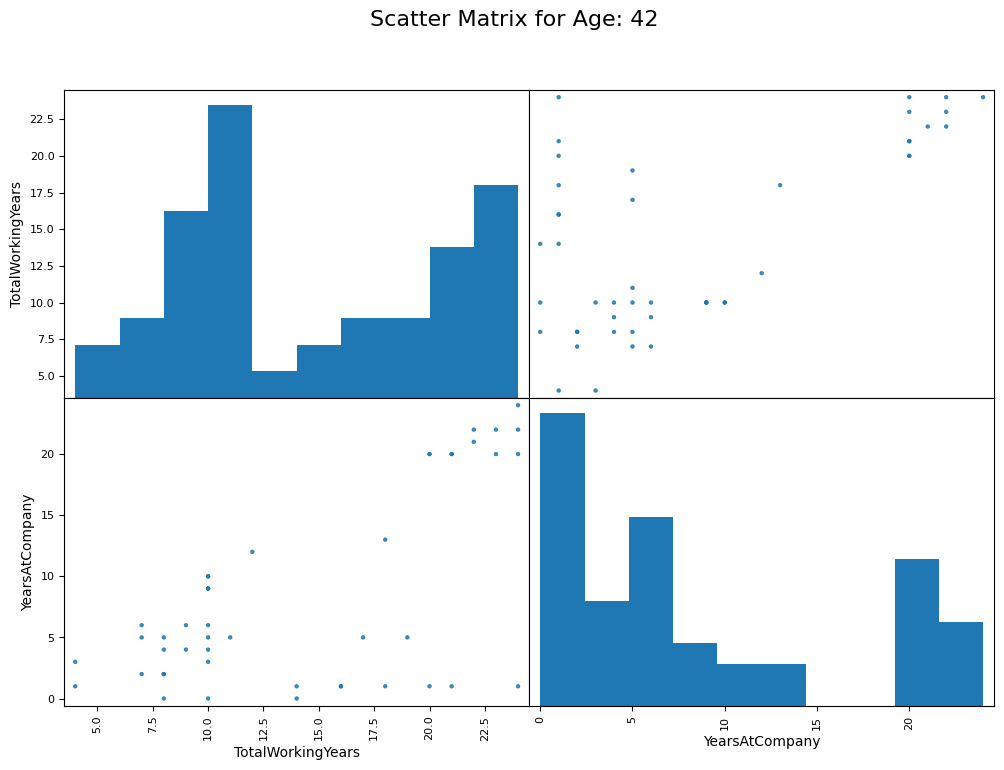

EmployeeIDs: [24], Median TotalWorkingYears: 11.0
--------------------------------------------------


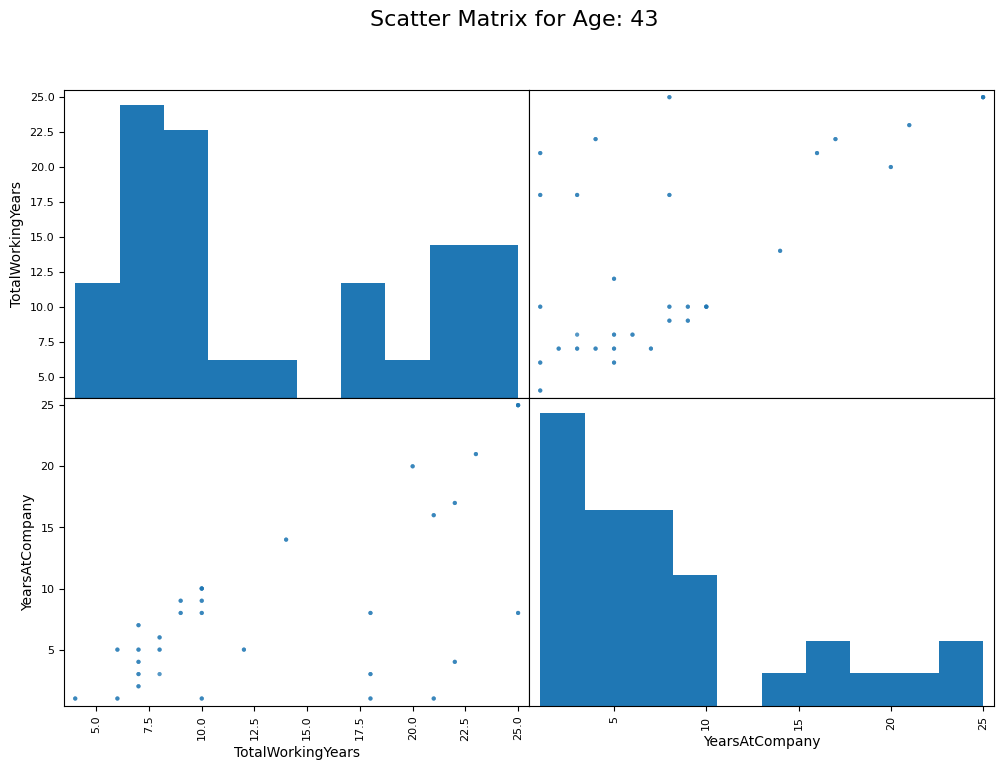

EmployeeIDs: [138], Median TotalWorkingYears: 10.0
--------------------------------------------------


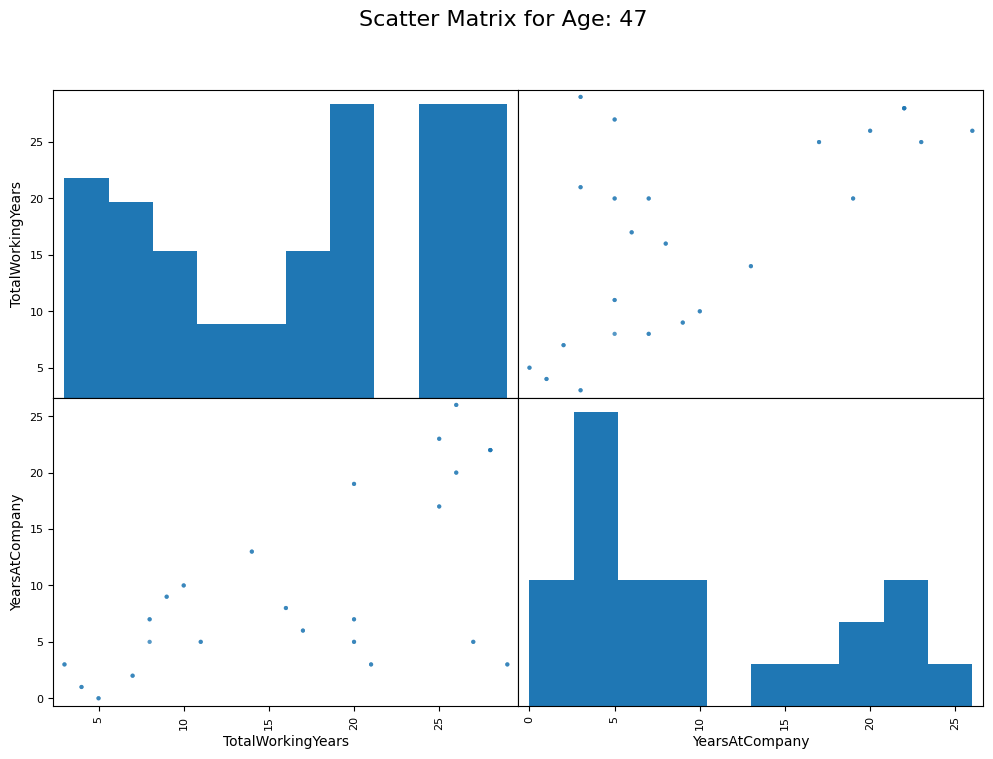

EmployeeIDs: [309], Median TotalWorkingYears: 20.0
--------------------------------------------------


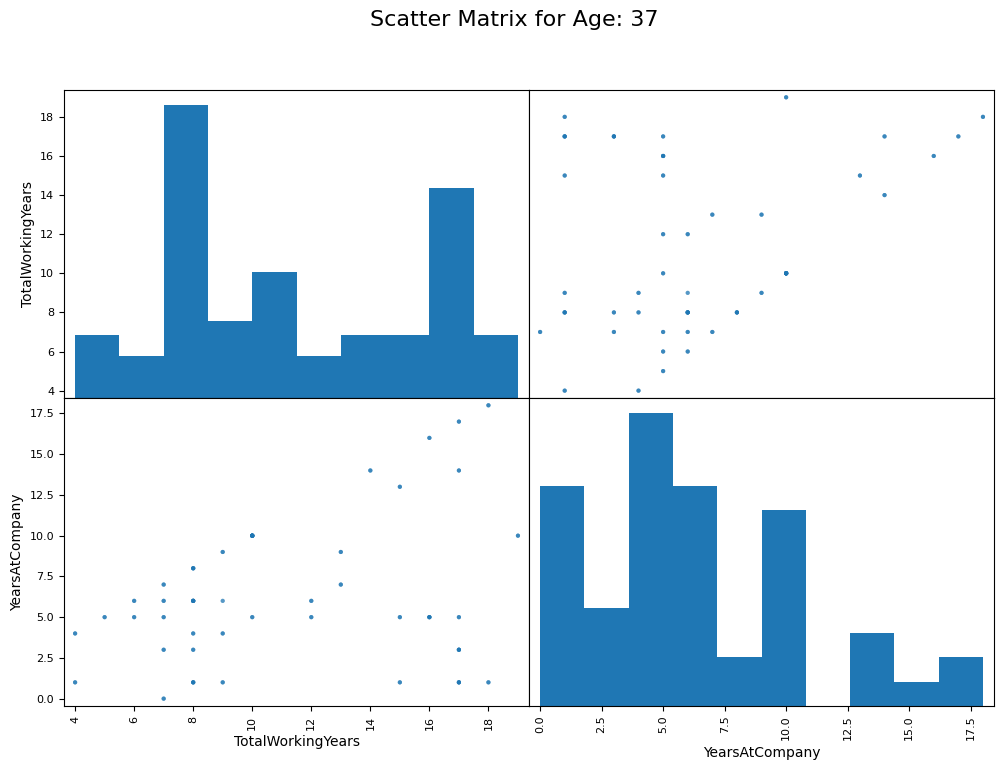

EmployeeIDs: [575], Median TotalWorkingYears: 10.0
--------------------------------------------------


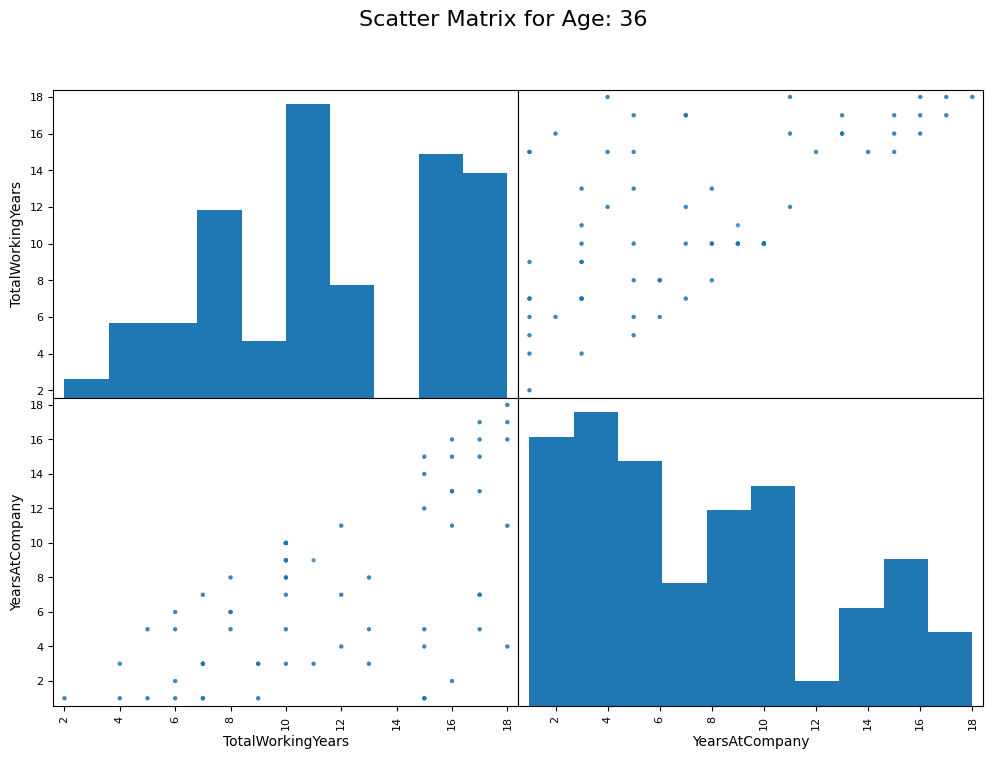

EmployeeIDs: [1518], Median TotalWorkingYears: 10.0
--------------------------------------------------


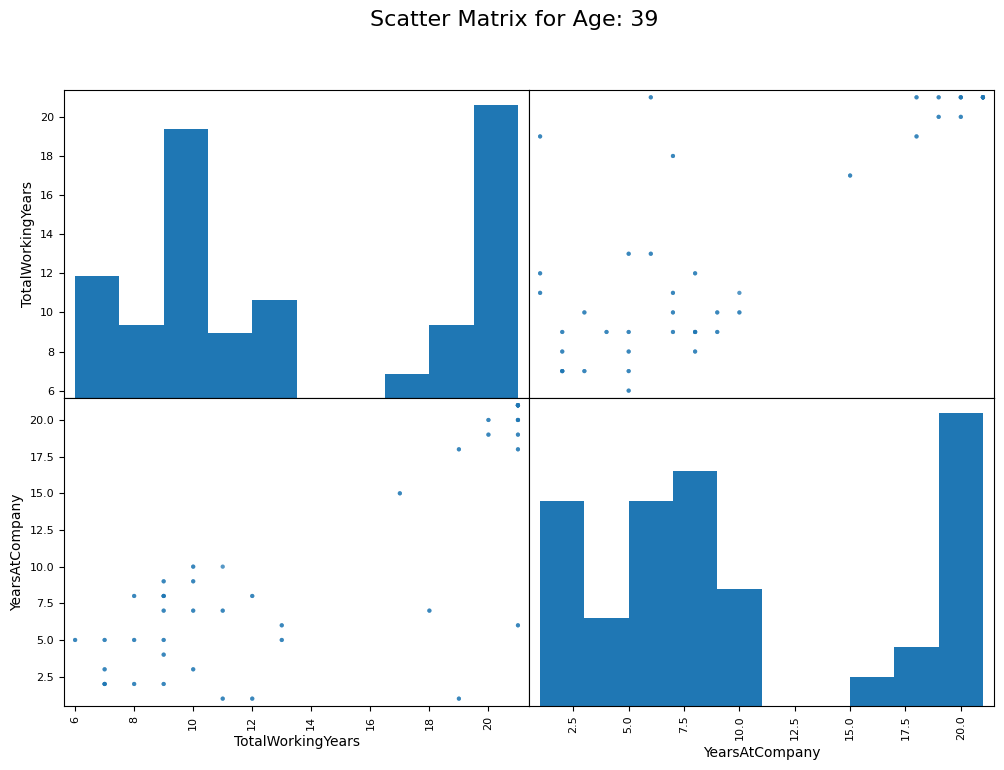

EmployeeIDs: [2368], Median TotalWorkingYears: 11.0
--------------------------------------------------


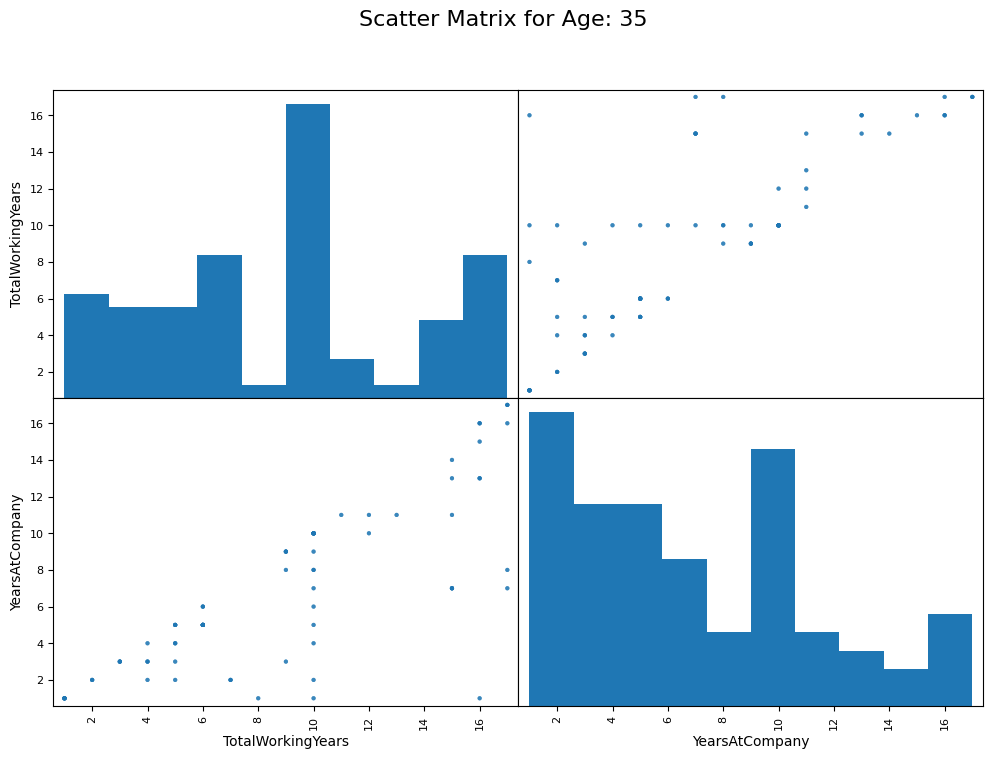

EmployeeIDs: [3121], Median TotalWorkingYears: 9.0
--------------------------------------------------


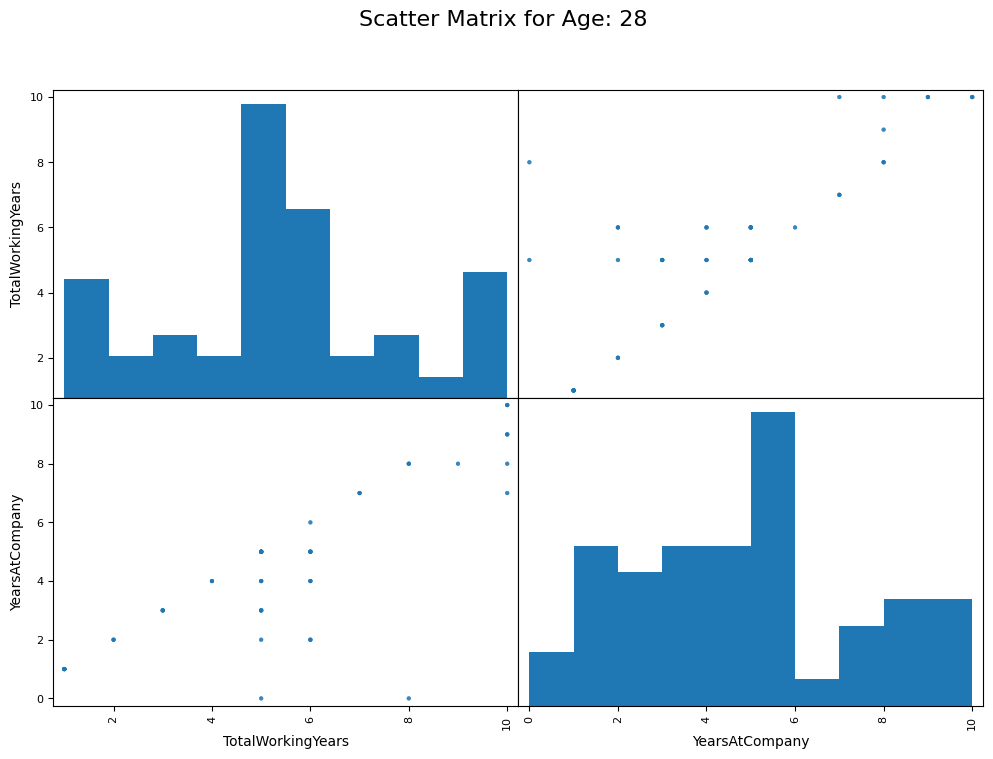

EmployeeIDs: [3819], Median TotalWorkingYears: 5.0
--------------------------------------------------


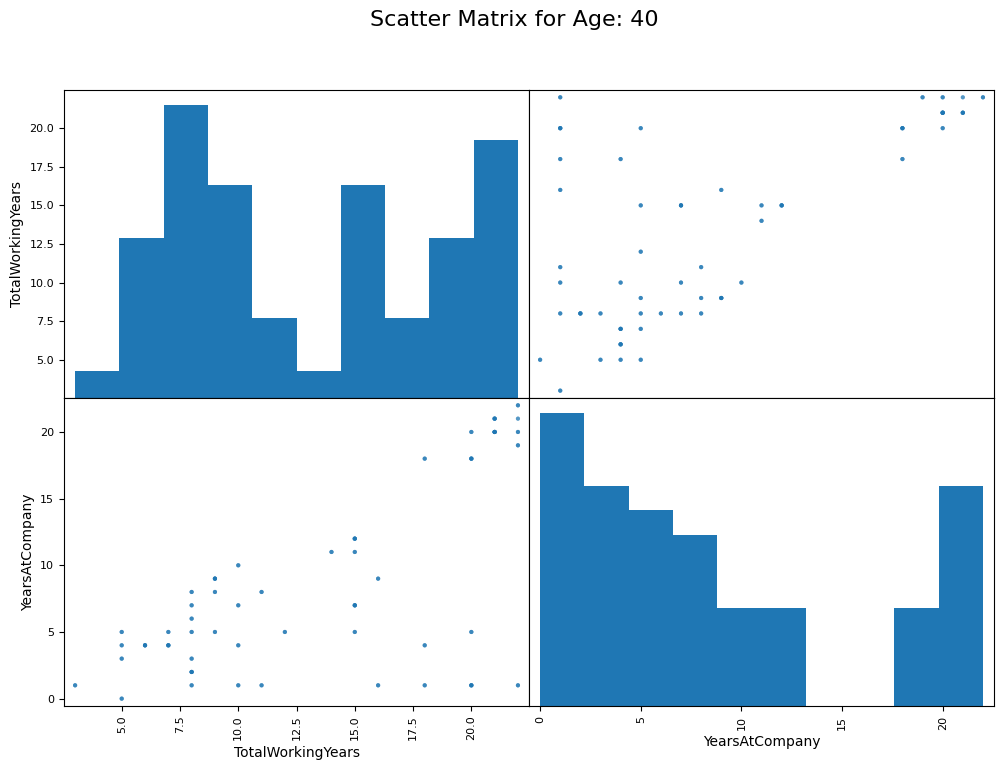

EmployeeIDs: [4410], Median TotalWorkingYears: 12.0
--------------------------------------------------


In [224]:
for i in missing_TWY_rows['Age']:
    age_table = general_data[general_data['Age'] == i]
    attributes = ["TotalWorkingYears", "YearsAtCompany"]
    scatter_matrix(age_table[attributes], figsize=(12, 8))
    plt.suptitle(f"Scatter Matrix for Age: {i}", fontsize=16)
    plt.show()
    median_TWY = age_table['TotalWorkingYears'].median()
    employee_ids = list(missing_TWY_rows[missing_TWY_rows['Age'] == i]['EmployeeID'])
    print(f"EmployeeIDs: {employee_ids}, Median TotalWorkingYears: {median_TWY}")
    print('-' * 50)


# I guess we are not able to make the regression based on the points set. So we go with the median of each age.

In [225]:
 
for i in missing_TWY_rows['Age']:
    age_table = general_data[general_data['Age'] == i]
    median_TWY = age_table['TotalWorkingYears'].median()
    employee_ids = missing_TWY_rows[missing_TWY_rows['Age'] == i]['EmployeeID']
    missing_TWY_rows.loc[missing_TWY_rows['EmployeeID'].isin(employee_ids), 'TotalWorkingYears'] = median_TWY
    general_data.loc[general_data['EmployeeID'].isin(employee_ids), 'TotalWorkingYears'] = median_TWY


In [226]:
missing_TWY_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,1,Manufacturing Director,89260,1.0,14,0,11.0,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,1,Manufacturing Director,37480,7.0,14,2,10.0,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,1,Research Director,27740,4.0,13,1,20.0,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,3,Manufacturing Director,166590,7.0,16,1,10.0,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1518,1,Sales Executive,85780,7.0,21,0,10.0,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,2368,1,Laboratory Technician,72640,0.0,17,0,11.0,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,3121,2,Sales Representative,28090,4.0,23,1,9.0,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,3819,2,Laboratory Technician,24130,1.0,16,1,5.0,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,4410,2,Laboratory Technician,54680,0.0,12,0,12.0,6,21,3,9


In [227]:
 a= general_data.corr(numeric_only=True)
a['NumCompaniesWorked'].sort_values(ascending=False)

NumCompaniesWorked         1.000000
Age                        0.299243
TotalWorkingYears          0.238425
PercentSalaryHike          0.030860
StockOptionLevel           0.017163
EmployeeID                -0.001117
JobLevel                  -0.009875
DistanceFromHome          -0.013843
Education                 -0.016250
MonthlyIncome             -0.020726
TrainingTimesLastYear     -0.032286
YearsSinceLastPromotion   -0.036656
YearsWithCurrManager      -0.109667
YearsAtCompany            -0.117959
Name: NumCompaniesWorked, dtype: float64

# Same Process with 'NumCompaniesWorked'

In [228]:
missing_NCW_rows = general_data[general_data['NumCompaniesWorked'].isna()]
missing_NCW_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,116,1,Sales Executive,23670,NaN,12,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,211,1,Laboratory Technician,99800,NaN,11,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,344,3,Manufacturing Director,22380,NaN,14,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,477,2,Sales Representative,49070,NaN,21,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,648,2,Healthcare Representative,48050,NaN,16,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,800,5,Research Scientist,44340,NaN,17,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,933,5,Research Scientist,50030,NaN,13,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1104,2,Healthcare Representative,83800,NaN,14,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1313,2,Healthcare Representative,54840,NaN,17,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,3,Research Scientist,99070,NaN,13,1,6.0,3,5,0,3


In [229]:
for i in missing_NCW_rows['Age']:
    age_table_NCW = general_data[general_data['Age'] == i]
    median_NCW = age_table_NCW['NumCompaniesWorked'].median()
    employee_ids_NCW = list(missing_NCW_rows[missing_NCW_rows['Age'] == i]['EmployeeID'])
    print(f"EmployeeIDs: {employee_ids_NCW}, Median NumCompaniesWorked: {median_NCW}")
    print('-' * 50)


EmployeeIDs: [116], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [211], Median NumCompaniesWorked: 2.0
--------------------------------------------------
EmployeeIDs: [344, 4396], Median NumCompaniesWorked: 3.0
--------------------------------------------------
EmployeeIDs: [477], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [648, 800], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [648, 800], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [933], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [1104], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [1313], Median NumCompaniesWorked: 3.0
--------------------------------------------------
EmployeeIDs: [1522], Median NumCompaniesWorked: 1.0
------------

In [230]:
for i in missing_NCW_rows['Age']:
    age_table_NCW = general_data[general_data['Age'] == i]
    median_NCW = age_table_NCW['NumCompaniesWorked'].median()
    employee_ids_NCW = list(missing_NCW_rows[missing_NCW_rows['Age'] == i]['EmployeeID'])
    missing_NCW_rows.loc[missing_NCW_rows['EmployeeID'].isin(employee_ids_NCW), 'NumCompaniesWorked'] = median_NCW
    general_data.loc[general_data['EmployeeID'].isin(employee_ids_NCW), 'NumCompaniesWorked'] = median_NCW

In [231]:
missing_NCW_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,116,1,Sales Executive,23670,1.0,12,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,211,1,Laboratory Technician,99800,2.0,11,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,344,3,Manufacturing Director,22380,3.0,14,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,477,2,Sales Representative,49070,1.0,21,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,648,2,Healthcare Representative,48050,1.0,16,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,800,5,Research Scientist,44340,1.0,17,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,933,5,Research Scientist,50030,1.0,13,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1104,2,Healthcare Representative,83800,1.0,14,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1313,2,Healthcare Representative,54840,3.0,17,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,3,Research Scientist,99070,1.0,13,1,6.0,3,5,0,3


In [232]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4410 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

# We have to encode the objects data type with OneHotEncoder, OrdinalEncoder, LabelEncoder based on if the data need order or not

In [233]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# 1. Encode 'Attrition' with LabelEncoder (binary classification)
label_encoder = LabelEncoder()
general_data['Attrition'] = label_encoder.fit_transform(general_data['Attrition'])

# 2. Encode 'BusinessTravel' with OrdinalEncoder (with custom order)
business_travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
ordinal_encoder = OrdinalEncoder(categories=[business_travel_order])
general_data['BusinessTravel'] = ordinal_encoder.fit_transform(general_data[['BusinessTravel']])

# 3. Encode 'Department' with OneHotEncoder (no order)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = onehot_encoder.fit_transform(general_data[['Department']])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['Department']))
general_data = general_data.drop('Department', axis=1)
general_data = general_data.join(encoded_df)

# 4. Encode 'EducationField' with OneHotEncoder (no order)
encoded_data = onehot_encoder.fit_transform(general_data[['EducationField']])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['EducationField']))
general_data = general_data.drop('EducationField', axis=1)
general_data = general_data.join(encoded_df)

# 5. Encode 'JobRole' with OneHotEncoder (no order)
encoded_data = onehot_encoder.fit_transform(general_data[['JobRole']])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['JobRole']))
general_data = general_data.drop('JobRole', axis=1)
general_data = general_data.join(encoded_df)


In [234]:
missing_rows = general_data[general_data['Attrition'].isna()]
missing_rows

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative


In [235]:
general_data

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,51,0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,1,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,0,2.0,17,4,3,4,193280,1.0,15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4406,29,0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4407,25,0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4408,42,0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# So now the first table is all numbers

In [236]:
correlation_matrix = general_data.corr()
print(correlation_matrix['Attrition'].sort_values(ascending=False))


Attrition                            1.000000
BusinessTravel                       0.127006
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.041709
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
EducationField_Marketing            -0.003780
EmployeeID                          -0.004729
StockOptionLevel                    -0.006839
DistanceFromHome                    -0.009730
JobLevel                            -0.010290
JobRole_Sales Representative        -0.011073
JobRole_Human Resources             -0.013857
Education                           -0.015111
Department_Research & Development   -0.015307
JobRole_Manager                     -0.017798
Department_Sales                    -0.019742
EducationField_Other              

# Trying different models for the first model just for tests

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = general_data.drop(columns=['Attrition', 'EmployeeID']) 
y = general_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (3528, 29), Testing set: (882, 29)


In [238]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8401360544217688


c:\Users\matv3\.conda\envs\AA\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [239]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.39982989580349204


In [240]:
import pandas as pd
incorrect_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
incorrect_rows = incorrect_predictions[incorrect_predictions['Actual'] != incorrect_predictions['Predicted']]
print(incorrect_rows)


      Actual  Predicted
2050       1          0
398        1          0
799        1          0
340        1          0
2164       1          0
...      ...        ...
3290       1          0
4134       1          0
177        1          0
1417       1          0
1426       1          0

[141 rows x 2 columns]


In [241]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8390022675736961


In [242]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.9852607709750567


In [243]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred_dtree)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.12140522651411392


In [244]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9920634920634921


In [245]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.7993197278911565


In [246]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge_reg = knn.predict(X_test)
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_knn))

Ridge Accuracy: 0.7993197278911565


array([[<Axes: xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <Axes: xlabel='Age', ylabel='TotalWorkingYears'>,
        <Axes: xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>],
       [<Axes: xlabel='TotalWorkingYears', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='YearsAtCompany', ylabel='Age'>],
       [<Axes: xlabel='TotalWorkingYears', ylabel='YearsAtCompany'>,
        <Axes: xlabel='Age', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsAtCompany', ylabel='YearsAtCompany'>]],
      dtype=object)

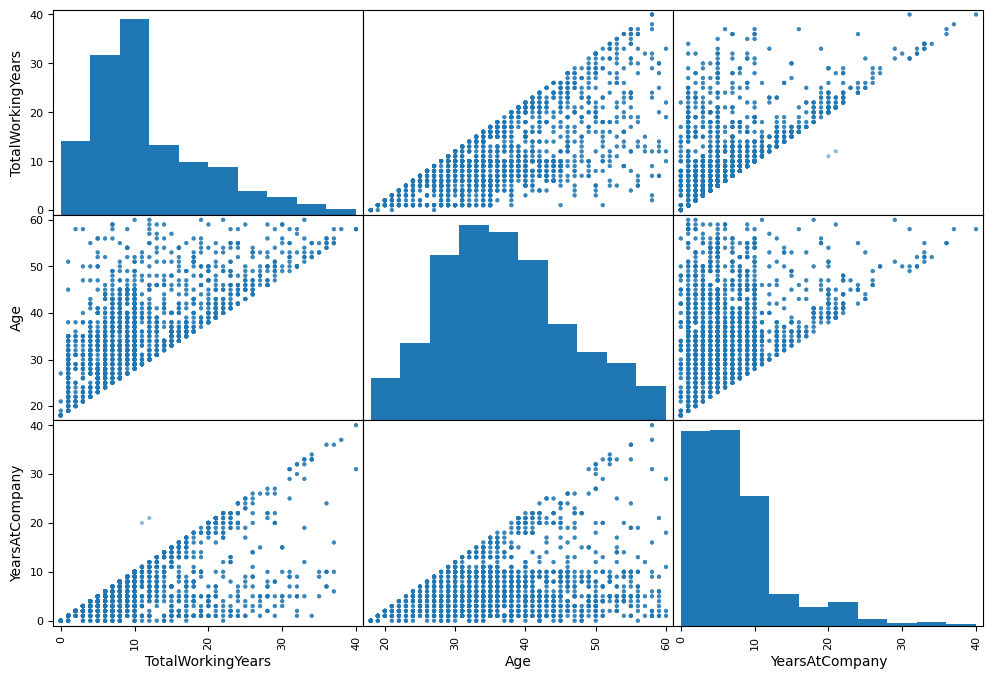

In [247]:
from pandas.plotting import scatter_matrix 

attributes = ["TotalWorkingYears", "Age", "YearsAtCompany"] 
scatter_matrix(general_data[attributes], figsize=(12, 8)) 

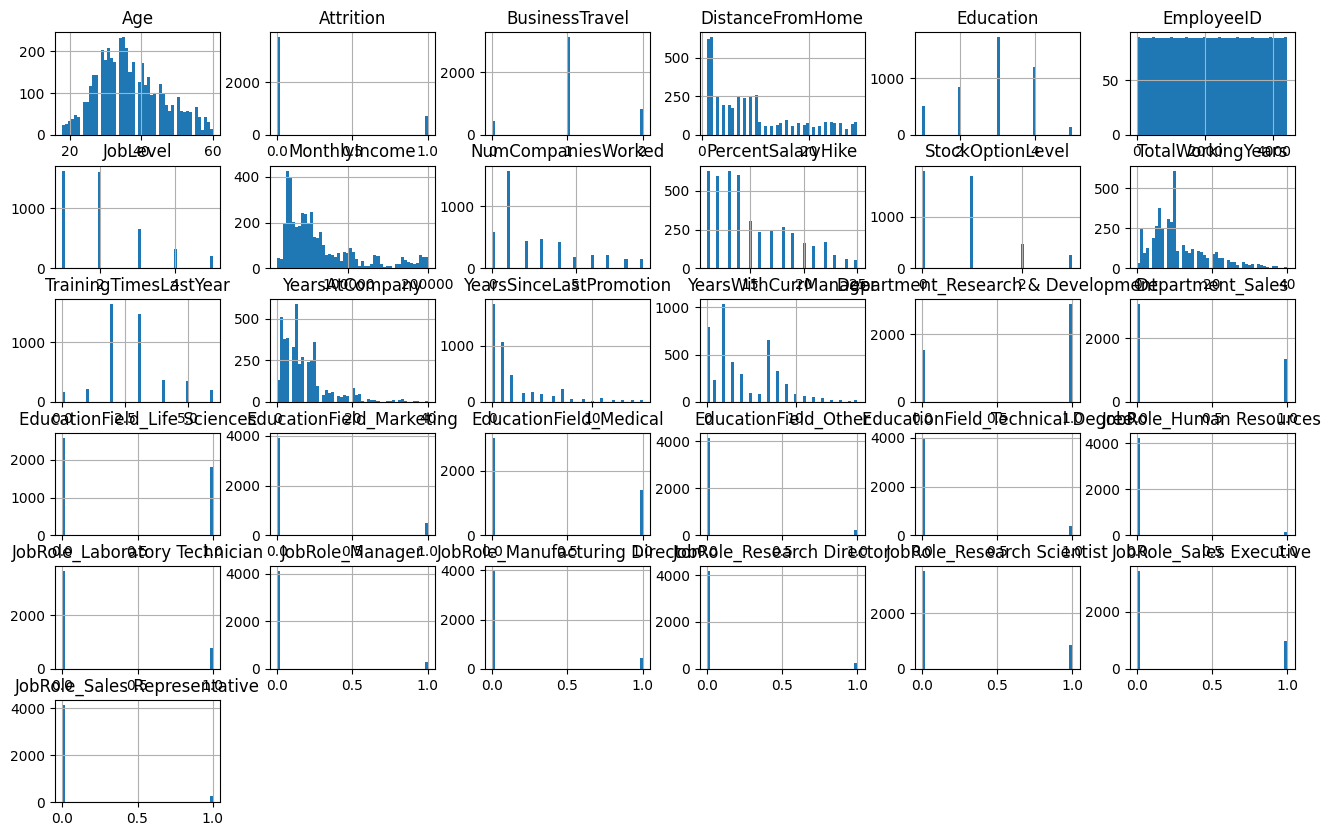

In [248]:
general_data.hist(bins=50, figsize=(16,10))
plt.show()

# Import Other tables

In [249]:
manager_survey_data = pd.read_csv('https://raw.githubusercontent.com/equisdel/INDIAI/refs/heads/Mathis/manager_survey_data.csv')

In [250]:
manager_survey_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [251]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


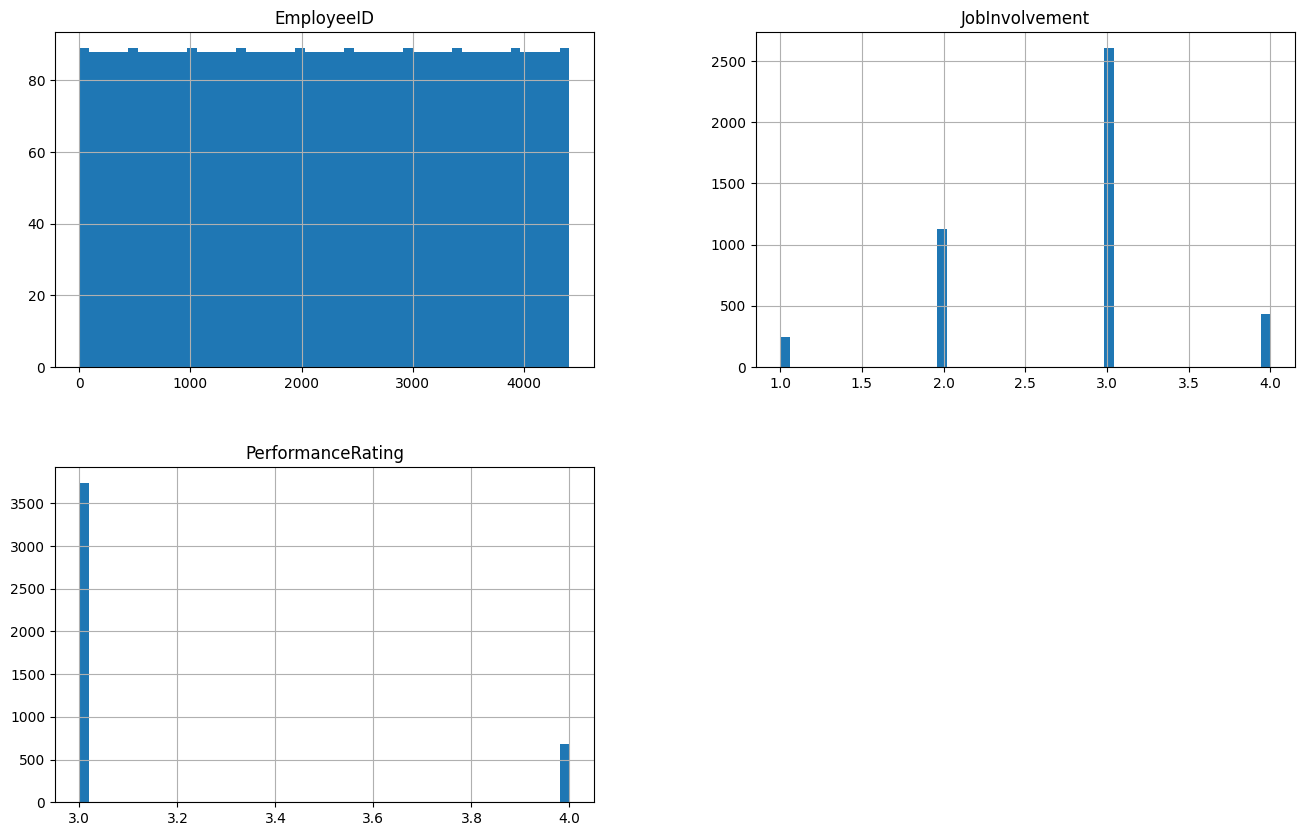

In [252]:
manager_survey_data.hist(bins=50, figsize=(16,10))
plt.show()

# Merge the first and second tables into a new variables

In [253]:
general_Msurvey_merged = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='inner')

In [254]:
general_Msurvey_merged

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement,PerformanceRating
0,51,0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
1,31,1,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4
2,32,0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,3
3,38,0,0.0,2,5,4,3,83210,3.0,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
4,32,0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3
4406,29,0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
4407,25,0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4
4408,42,0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3


In [255]:
employee_survey_data = pd.read_csv('https://raw.githubusercontent.com/equisdel/INDIAI/refs/heads/Mathis/employee_survey_data.csv')

In [256]:
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [257]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


# So the third table has missing values, let's check for all the rows that have it but we skip it for now

In [258]:
missing_rows_employee_survey_data = employee_survey_data[employee_survey_data.isna().any(axis=1)]
missing_rows_employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
11,12,NaN,4.0,3.0
40,41,3.0,NaN,3.0
84,85,3.0,4.0,NaN
111,112,NaN,2.0,3.0
124,125,3.0,NaN,3.0
...,...,...,...,...
4219,4220,2.0,NaN,3.0
4305,4306,2.0,2.0,NaN
4332,4333,NaN,4.0,3.0
4345,4346,4.0,NaN,4.0


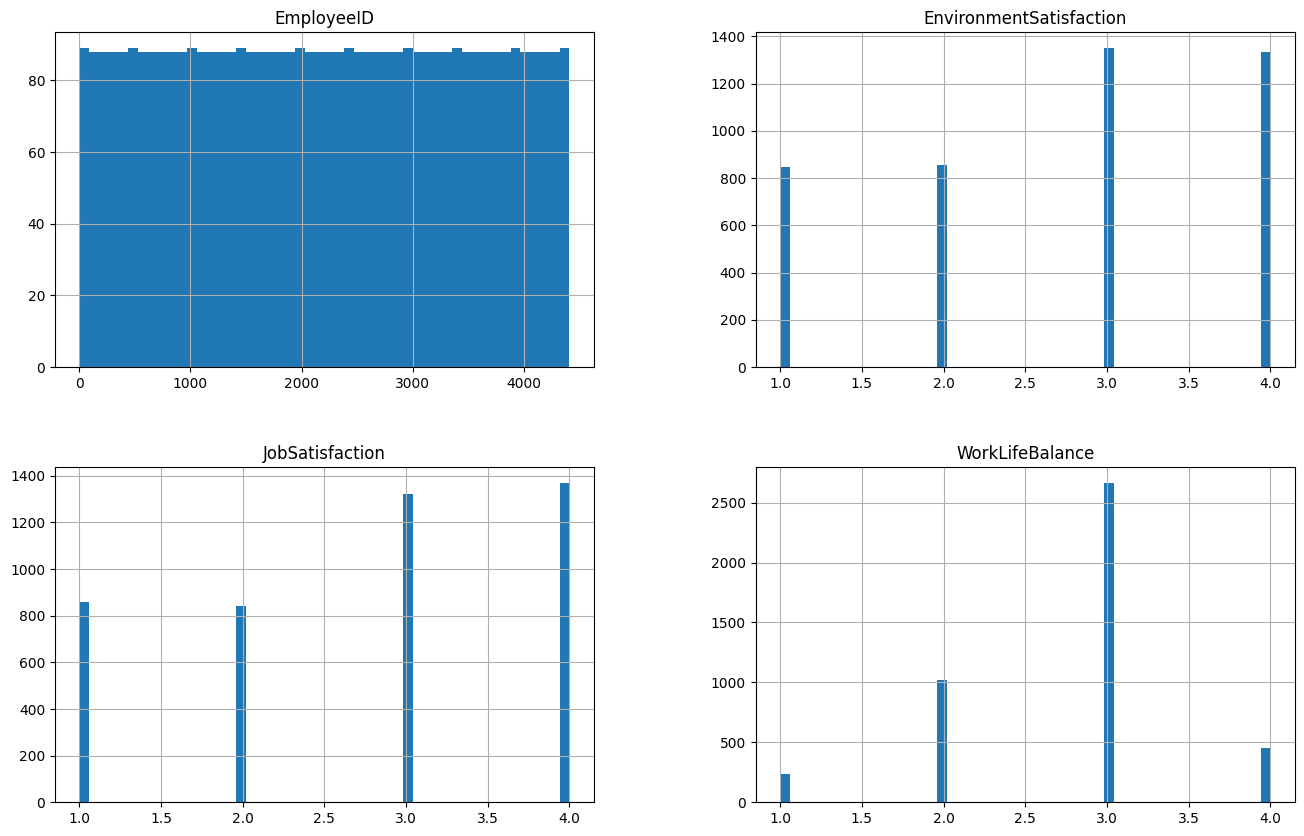

In [259]:
employee_survey_data.hist(bins=50, figsize=(16,10))
plt.show()

In [260]:
general_Msurvey_merged

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement,PerformanceRating
0,51,0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
1,31,1,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4
2,32,0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,3
3,38,0,0.0,2,5,4,3,83210,3.0,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
4,32,0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3
4406,29,0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3
4407,25,0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4
4408,42,0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3


In [261]:
correlation_matrix = general_Msurvey_merged.corr()
print(correlation_matrix['Attrition'].sort_values(ascending=False))

Attrition                            1.000000
BusinessTravel                       0.127006
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.041709
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
PerformanceRating                    0.023403
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
EducationField_Marketing            -0.003780
EmployeeID                          -0.004729
StockOptionLevel                    -0.006839
DistanceFromHome                    -0.009730
JobLevel                            -0.010290
JobRole_Sales Representative        -0.011073
JobRole_Human Resources             -0.013857
Education                           -0.015111
Department_Research & Development   -0.015307
JobInvolvement                      -0.015588
JobRole_Manager                   

# Making new tests on the merge table

In [262]:
from sklearn.model_selection import train_test_split
X_merged = general_Msurvey_merged.drop(columns=['Attrition', 'EmployeeID']) 
y_merged = general_Msurvey_merged['Attrition']
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size=0.2, random_state=42, stratify=y_merged)
print(f"Training set: {X_train_merged.shape}, Testing set: {X_test_merged.shape}")

Training set: (3528, 31), Testing set: (882, 31)


In [263]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_merged, y_train_merged)
y_pred_merged = log_reg.predict(X_test_merged)
print("Accuracy:", accuracy_score(y_test_merged, y_pred_merged))

Accuracy: 0.8401360544217688


c:\Users\matv3\.conda\envs\AA\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [264]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_merged, y_train_merged)
y_pred_rf_merged = rf.predict(X_test_merged)
print("Random Forest Accuracy:", accuracy_score(y_test_merged, y_pred_rf_merged))

Random Forest Accuracy: 0.9965986394557823


# We are working now with the time tables

In [265]:
in_time = pd.read_csv('https://raw.githubusercontent.com/equisdel/INDIAI/refs/heads/Mathis/in_time.csv')

In [266]:
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [267]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [268]:
out_time = pd.read_csv('https://raw.githubusercontent.com/equisdel/INDIAI/refs/heads/Mathis/out_time.csv')

In [269]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


# Show all the empty columns

In [270]:
colonnes_vides = out_time.columns[out_time.isna().all()]
print("Colonnes entièrement vides :", list(colonnes_vides))

Colonnes entièrement vides : ['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01', '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10', '2015-11-11', '2015-12-25']


# Create a table with Total working hours, days off, average daily working hours

In [271]:
import pandas as pd

# Convert columns in datetime format except for the first one (EmployeeID)
# We use 'errors="coerce"' to handle invalid datetime formats (they will be converted to NaT)
in_time_values = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
out_time_values = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

# Calculate the daily working hours by subtracting in_time from out_time
work_hours = out_time_values - in_time_values

# Convert the timedelta (difference between out_time and in_time) to hours (total_seconds / 3600)
work_hours = work_hours.apply(lambda col: col.map(lambda x: x.total_seconds() / 3600 if pd.notnull(x) else x))

# Calculate the number of days off 
days_off = work_hours.isna().sum(axis=1)

# Calculate the average working hours per day for each employee
# This excludes the missing values (NaN) from the average calculation
average_hours = work_hours.mean(axis=1)

# Calculate the total working hours for each employee 
total_work_hours = work_hours.sum(axis=1)

# Create a final DataFrame 
result_df = pd.DataFrame({
    "EmployeeID": in_time.iloc[:, 0],  
    "Total Heures": total_work_hours, 
    "Jours Off": days_off,  
    "Moyenne Heures/Jour": average_hours  
})

# Display the final DataFrame
result_df


,EmployeeID,Total Heures,Jours Off,Moyenne Heures/Jour
0,1,1710.686944,29,7.373651
1,2,1821.676667,25,7.718969
2,3,1697.204167,19,7.01324
3,4,1690.514444,26,7.193678
4,5,1961.512778,16,8.006175
...,...,...,...,...
4405,4406,2070.913333,18,8.522277
4406,4407,1468.401944,20,6.092954
4407,4408,1780.231944,30,7.706632
4408,4409,2287.715278,20,9.492595


In [272]:
general_Msurvey_time_merged = pd.merge(general_Msurvey_merged, result_df, on='EmployeeID', how='inner')

In [273]:
general_Msurvey_time_merged

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement,PerformanceRating,Total Heures,Jours Off,Moyenne Heures/Jour
0,51,0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,0.0,0.0,0.0,3,3,1710.686944,29,7.373651
1,31,1,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,1.0,0.0,0.0,2,4,1821.676667,25,7.718969
2,32,0,2.0,17,4,3,4,193280,1.0,15,...,0.0,0.0,0.0,1.0,0.0,3,3,1697.204167,19,7.01324
3,38,0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,0.0,0.0,0.0,2,3,1690.514444,26,7.193678
4,32,0,1.0,10,1,5,1,23420,4.0,12,...,0.0,0.0,0.0,1.0,0.0,3,3,1961.512778,16,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,1.0,0.0,0.0,3,3,2070.913333,18,8.522277
4406,29,0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,0.0,0.0,0.0,2,3,1468.401944,20,6.092954
4407,25,0,1.0,25,2,4408,2,37020,0.0,20,...,0.0,0.0,0.0,1.0,0.0,3,4,1780.231944,30,7.706632
4408,42,0,1.0,18,2,4409,1,23980,0.0,14,...,0.0,0.0,0.0,0.0,0.0,2,3,2287.715278,20,9.492595


In [274]:
print(general_Msurvey_time_merged['Attrition'].value_counts())

Attrition
0    3699
1     711
Name: count, dtype: int64


In [275]:
corr_matrix = general_Msurvey_time_merged.corr()
print(corr_matrix['Attrition'].sort_values(ascending=False))

Attrition                            1.000000
Moyenne Heures/Jour                  0.201688
Total Heures                         0.198890
BusinessTravel                       0.127006
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.041709
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
PerformanceRating                    0.023403
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
EducationField_Marketing            -0.003780
EmployeeID                          -0.004729
StockOptionLevel                    -0.006839
DistanceFromHome                    -0.009730
JobLevel                            -0.010290
JobRole_Sales Representative        -0.011073
JobRole_Human Resources             -0.013857
Education                           -0.015111
Department_Research & Development 

In [276]:
X_merged_2 = general_Msurvey_time_merged.drop(columns=['Attrition', 'EmployeeID']) 
y_merged_2 = general_Msurvey_time_merged['Attrition']
X_train_merged_2, X_test_merged_2, y_train_merged_2, y_test_merged_2 = train_test_split(X_merged_2, y_merged_2, test_size=0.2, random_state=42, stratify=y_merged_2)
print(f"Training set: {X_train_merged_2.shape}, Testing set: {X_test_merged_2.shape}")

Training set: (3528, 34), Testing set: (882, 34)


In [277]:
from sklearn.linear_model import LogisticRegression

log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train_merged_2, y_train_merged_2)
y_pred_merged_2 = log_reg_2.predict(X_test_merged_2)
print("Accuracy:", accuracy_score(y_test_merged_2, y_pred_merged_2))

Accuracy: 0.8424036281179138


c:\Users\matv3\.conda\envs\AA\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
from sklearn.ensemble import RandomForestClassifier

rf_2 = RandomForestClassifier()
rf_2.fit(X_train_merged_2, y_train_merged_2)
y_pred_rf_merged_2 = rf_2.predict(X_test_merged_2)
print("Random Forest Accuracy:", accuracy_score(y_test_merged_2, y_pred_rf_merged_2))

Random Forest Accuracy: 0.9863945578231292


# Merge the third table with the missing values

# Merge the last table and from all the rows of the third table with missing values we check for common IDs. And we remove all the rows with missing data on the whole table for ethics ?

In [279]:
general_Msurvey_time_Esurvey_merged = pd.merge(general_Msurvey_time_merged, employee_survey_data, on='EmployeeID', how='inner')

In [280]:
common_ids = set(general_Msurvey_time_Esurvey_merged['EmployeeID']) & set(missing_rows_employee_survey_data['EmployeeID'])
general_Msurvey_time_Esurvey_merged_clean = general_Msurvey_time_Esurvey_merged[~general_Msurvey_time_Esurvey_merged['EmployeeID'].isin(common_ids)]

In [281]:
general_Msurvey_time_Esurvey_merged_clean

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement,PerformanceRating,Total Heures,Jours Off,Moyenne Heures/Jour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,1.0,6,2,1,1,131160,1.0,11,...,0.0,0.0,3,3,1710.686944,29,7.373651,3.0,4.0,2.0
1,31,1,2.0,10,1,2,1,41890,0.0,23,...,0.0,0.0,2,4,1821.676667,25,7.718969,3.0,2.0,4.0
2,32,0,2.0,17,4,3,4,193280,1.0,15,...,1.0,0.0,3,3,1697.204167,19,7.01324,2.0,2.0,1.0
3,38,0,0.0,2,5,4,3,83210,3.0,11,...,0.0,0.0,2,3,1690.514444,26,7.193678,4.0,4.0,3.0
4,32,0,1.0,10,1,5,1,23420,4.0,12,...,1.0,0.0,3,3,1961.512778,16,8.006175,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,1.0,4,3,4405,2,35390,1.0,18,...,0.0,0.0,2,3,1772.153889,18,7.292814,3.0,4.0,3.0
4405,42,0,1.0,5,4,4406,1,60290,3.0,17,...,0.0,0.0,3,3,2070.913333,18,8.522277,4.0,1.0,3.0
4406,29,0,1.0,2,4,4407,1,26790,2.0,15,...,0.0,0.0,2,3,1468.401944,20,6.092954,4.0,4.0,3.0
4407,25,0,1.0,25,2,4408,2,37020,0.0,20,...,1.0,0.0,3,4,1780.231944,30,7.706632,1.0,3.0,3.0


In [282]:
corr_matrix_2 = general_Msurvey_time_Esurvey_merged_clean.corr()
print(corr_matrix_2['Attrition'].sort_values(ascending=False))

Attrition                            1.000000
Moyenne Heures/Jour                  0.200943
Total Heures                         0.197966
BusinessTravel                       0.124459
JobRole_Research Director            0.050739
NumCompaniesWorked                   0.042664
PercentSalaryHike                    0.033702
JobRole_Research Scientist           0.030121
PerformanceRating                    0.024811
EducationField_Life Sciences         0.011414
JobRole_Sales Executive              0.010022
EducationField_Medical               0.000070
JobRole_Laboratory Technician       -0.000205
EmployeeID                          -0.001666
EducationField_Marketing            -0.004642
StockOptionLevel                    -0.006721
DistanceFromHome                    -0.008377
JobRole_Sales Representative        -0.009597
JobLevel                            -0.012453
Education                           -0.013214
JobRole_Human Resources             -0.013369
JobInvolvement                    

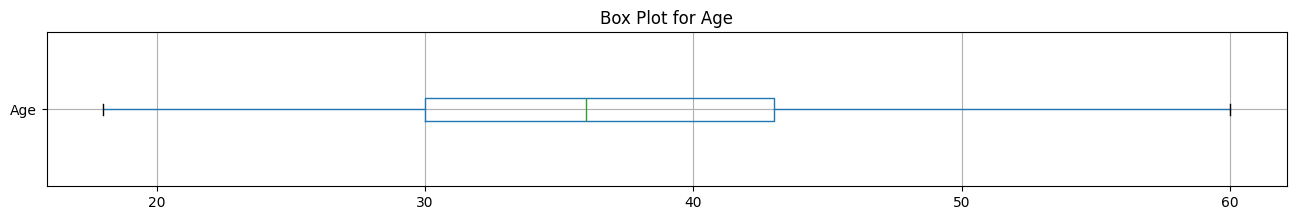

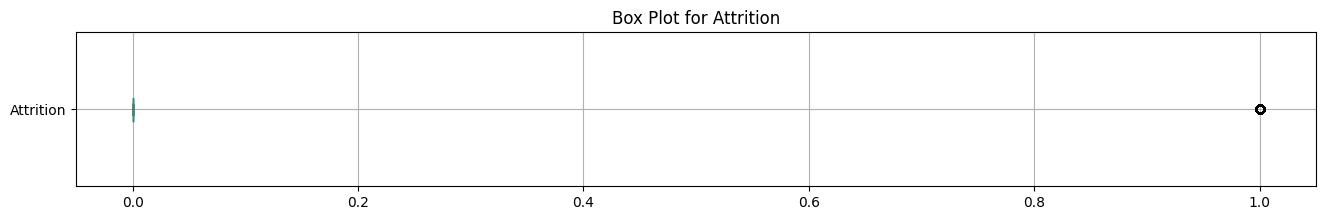

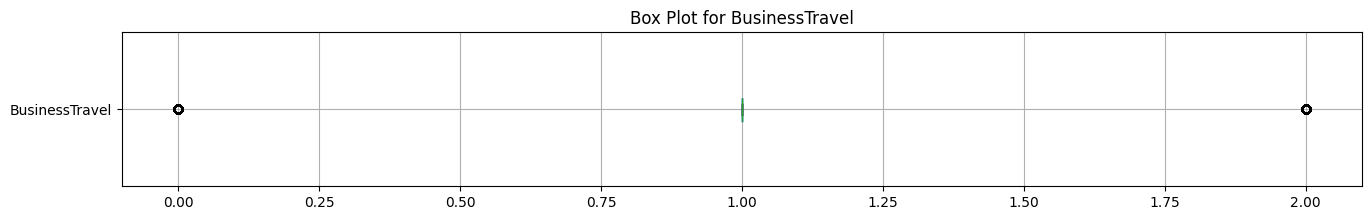

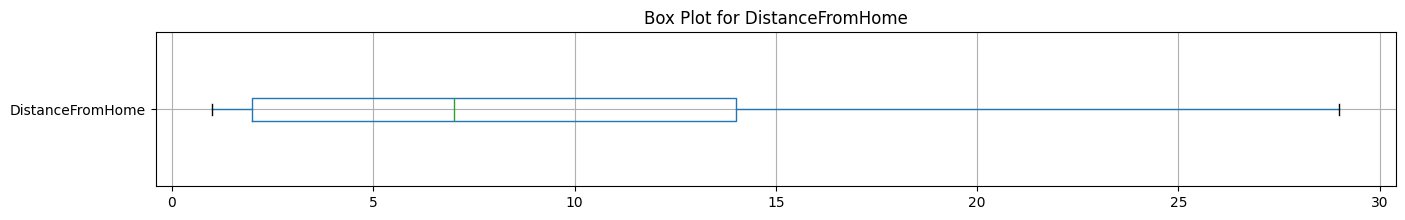

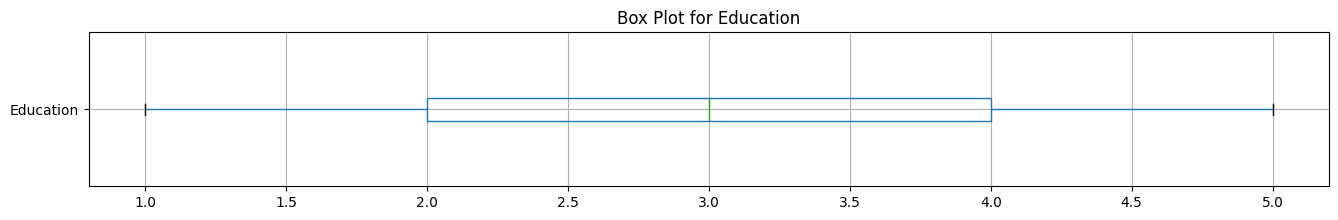

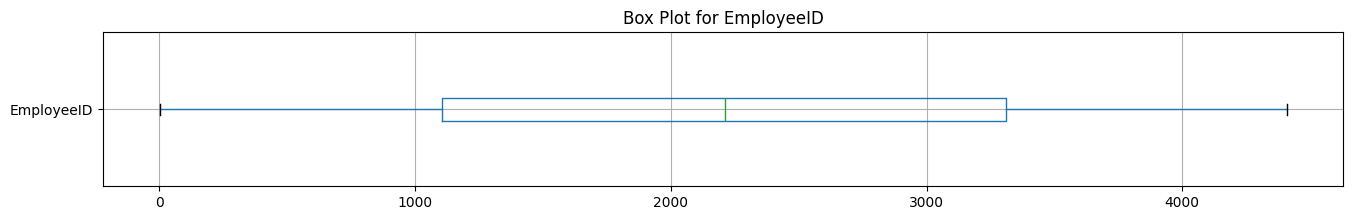

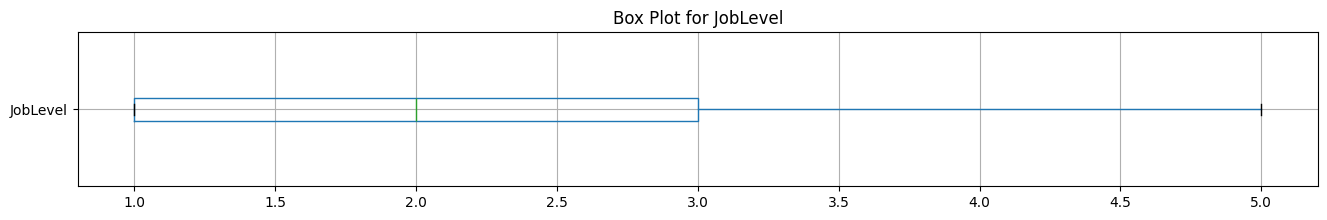

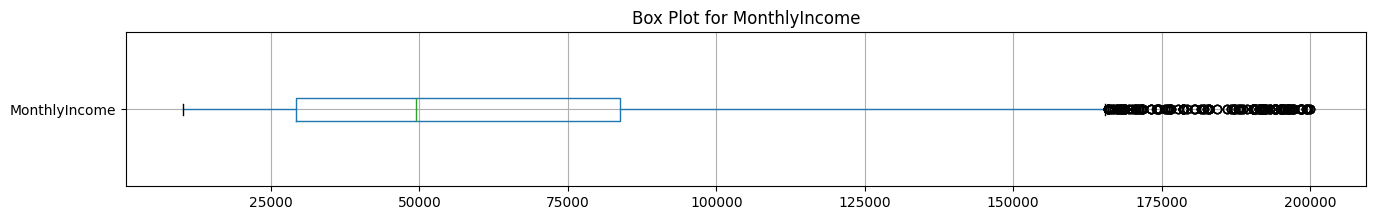

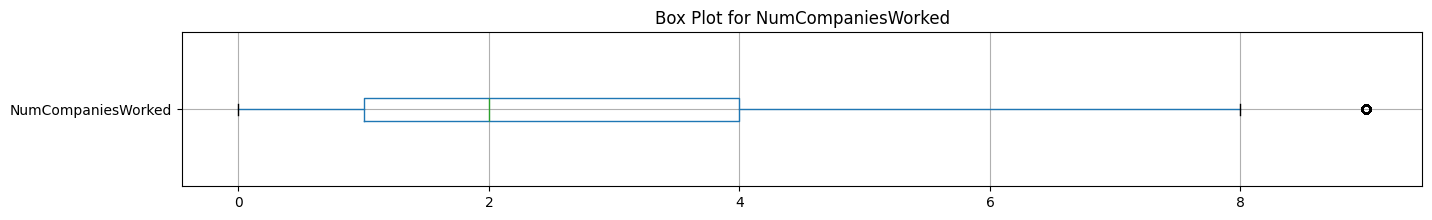

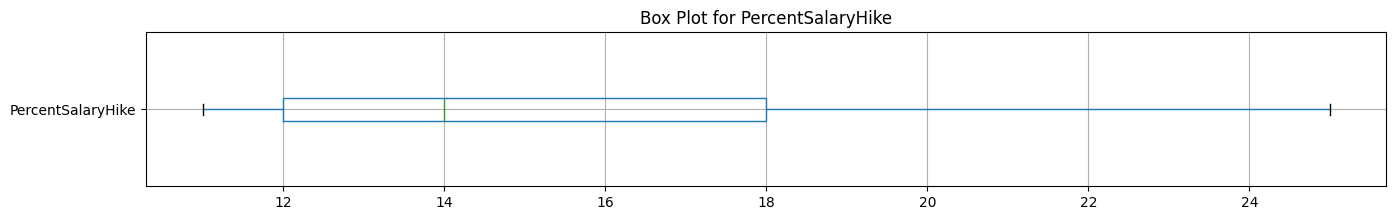

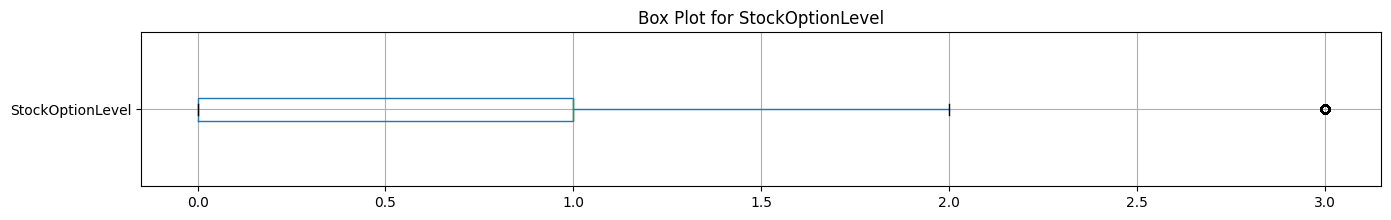

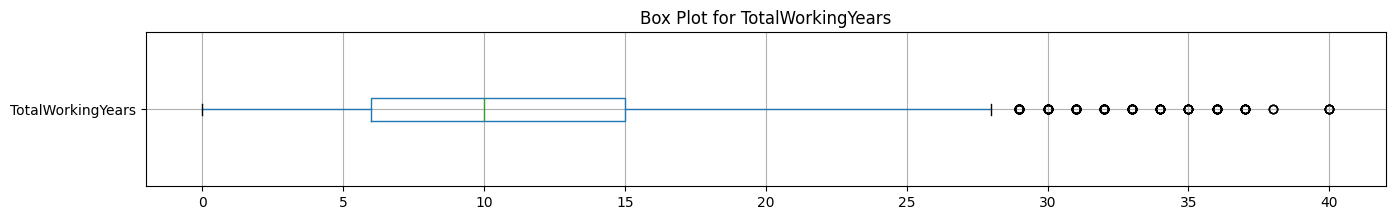

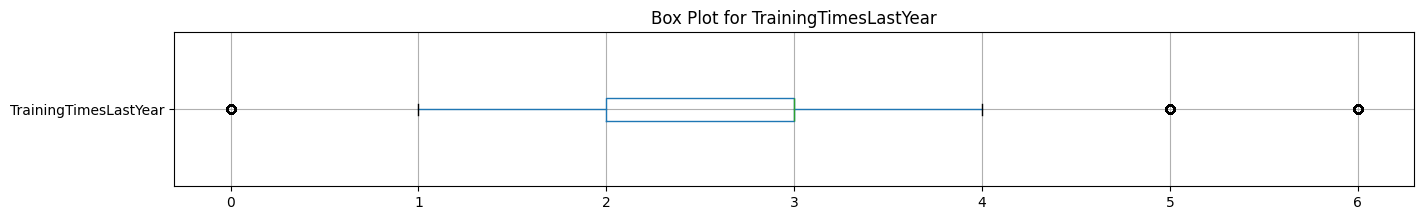

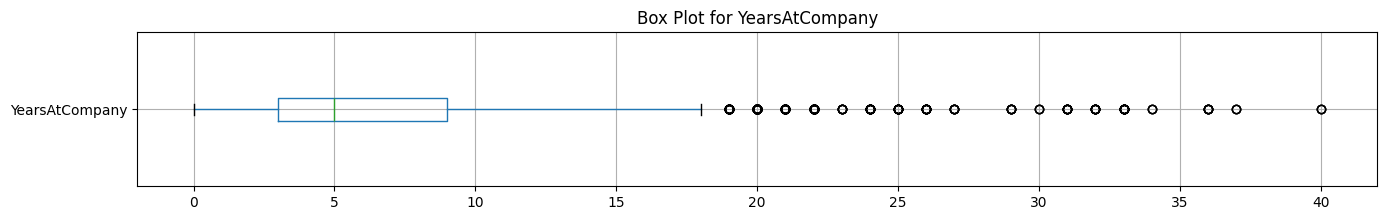

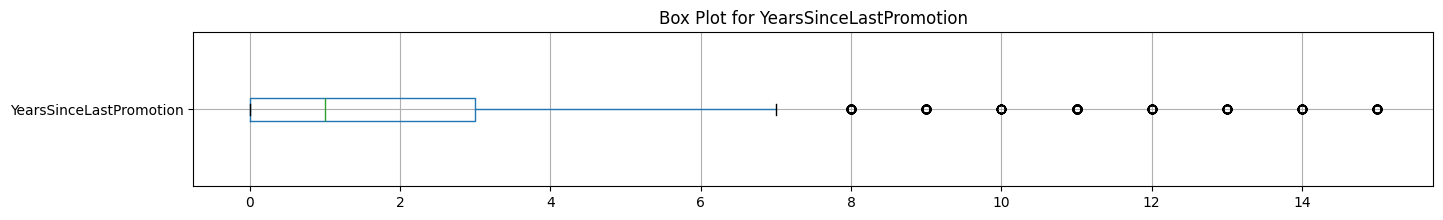

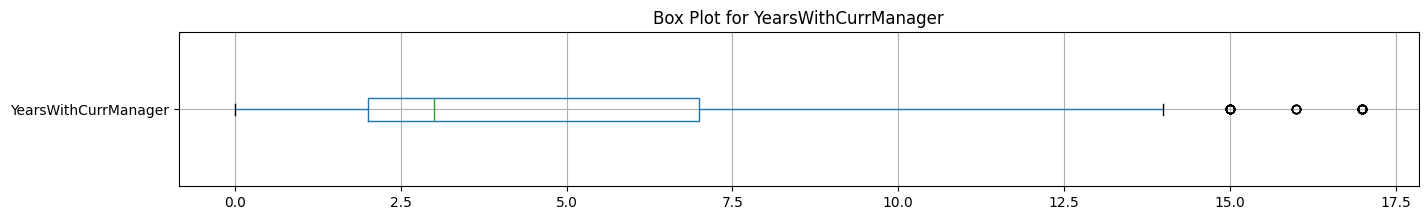

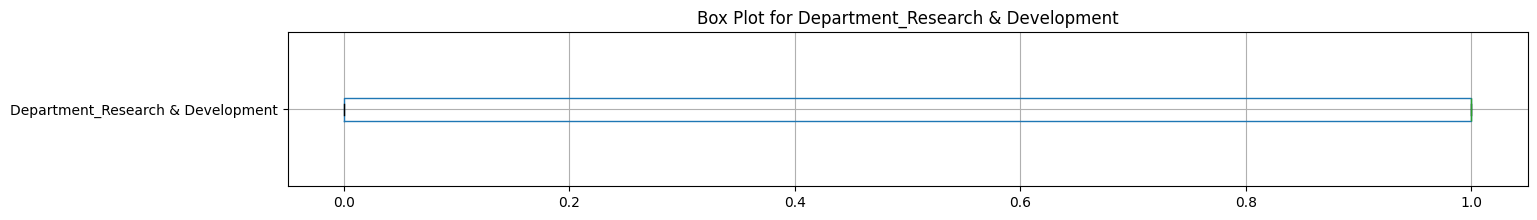

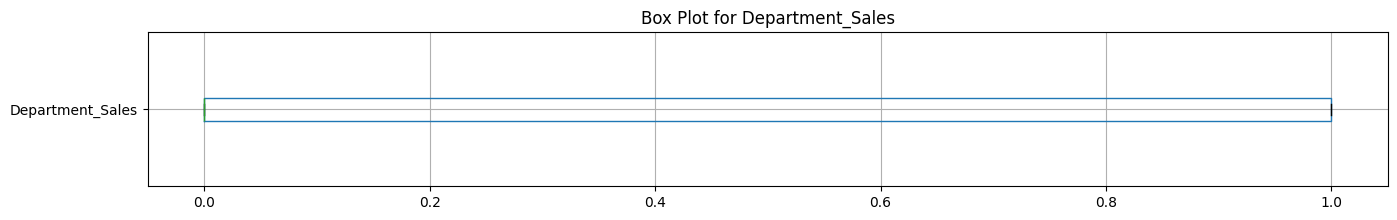

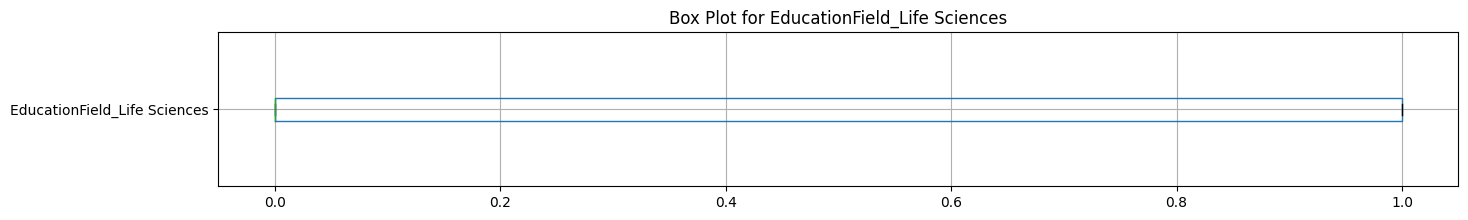

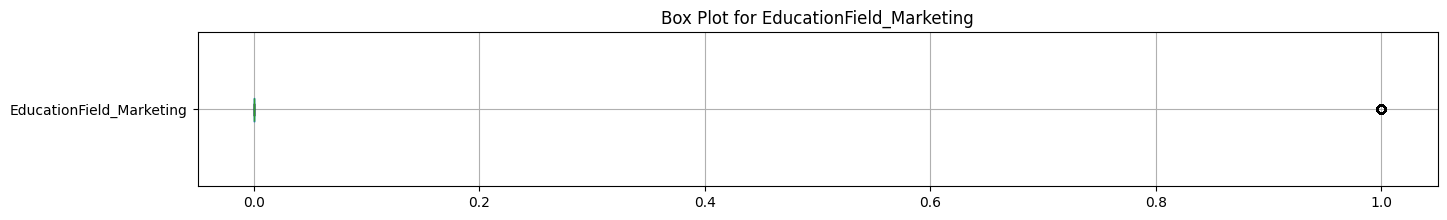

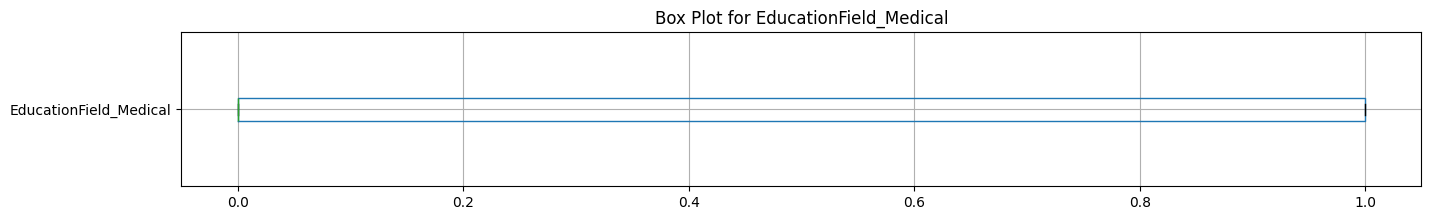

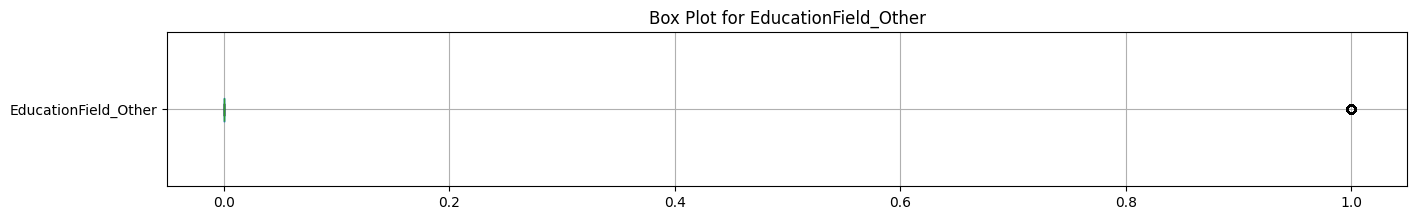

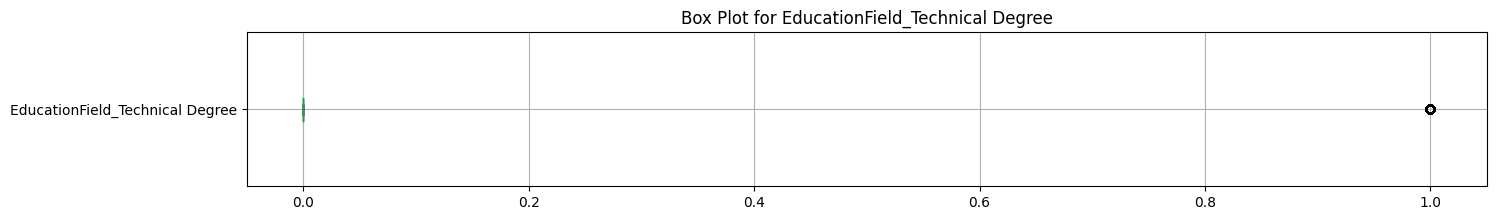

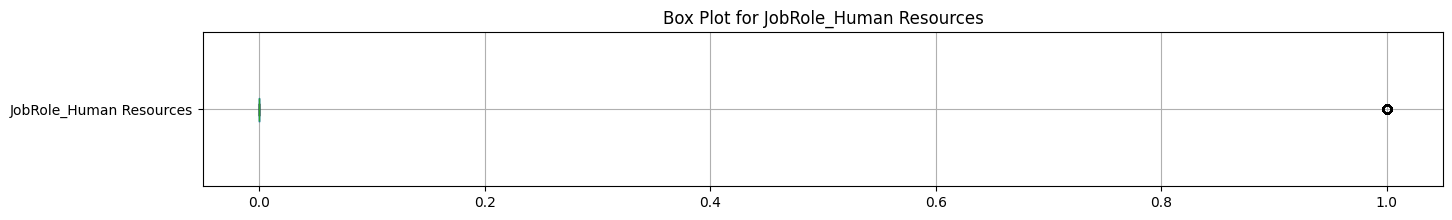

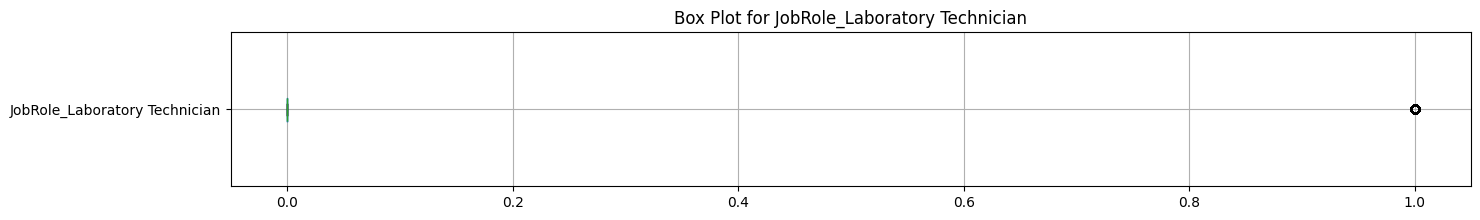

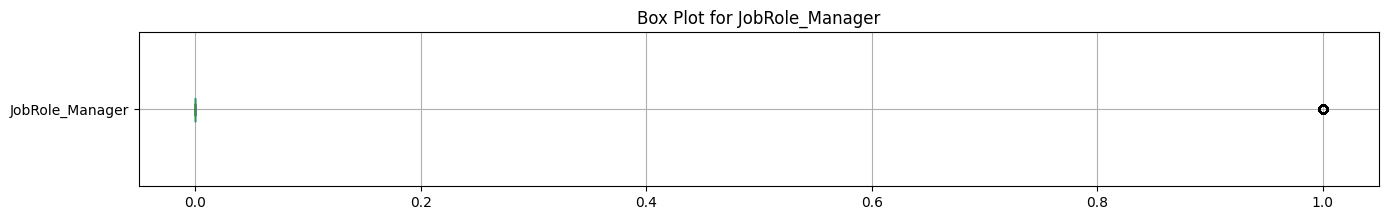

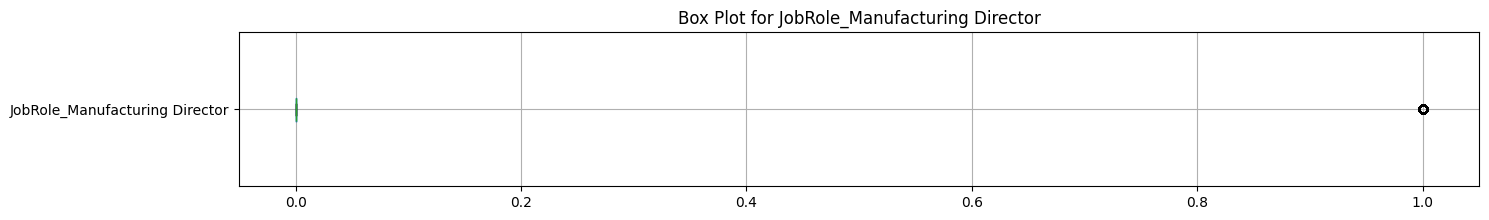

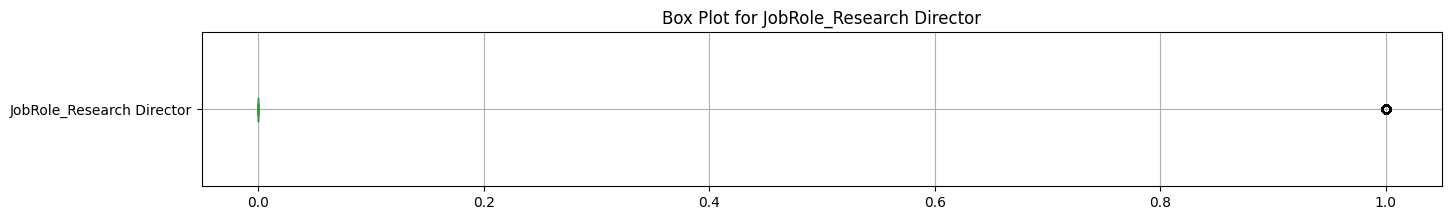

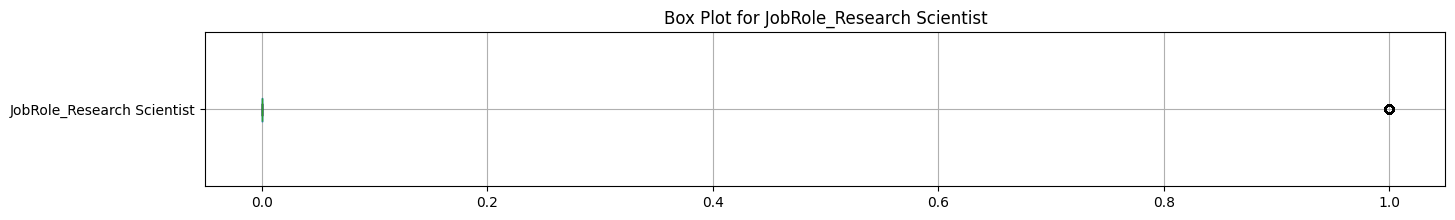

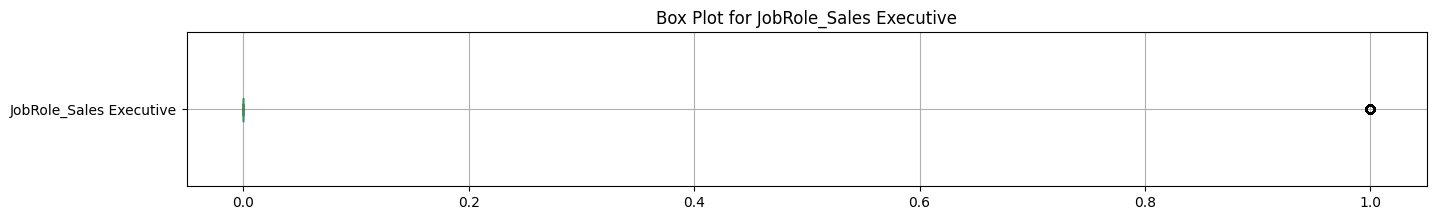

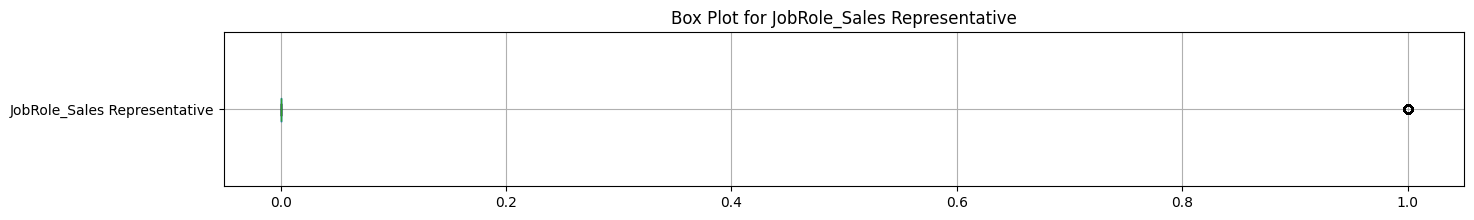

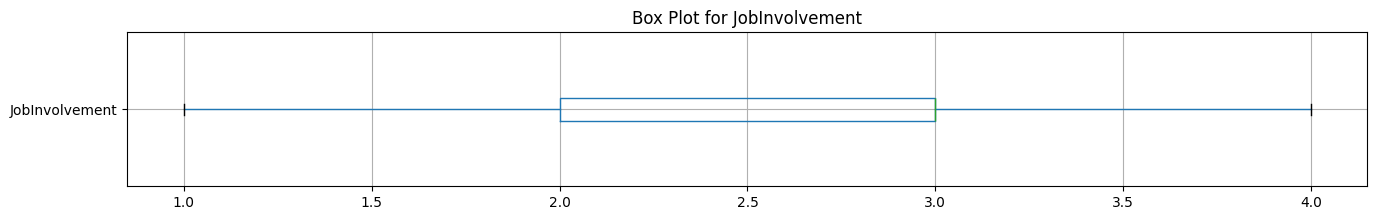

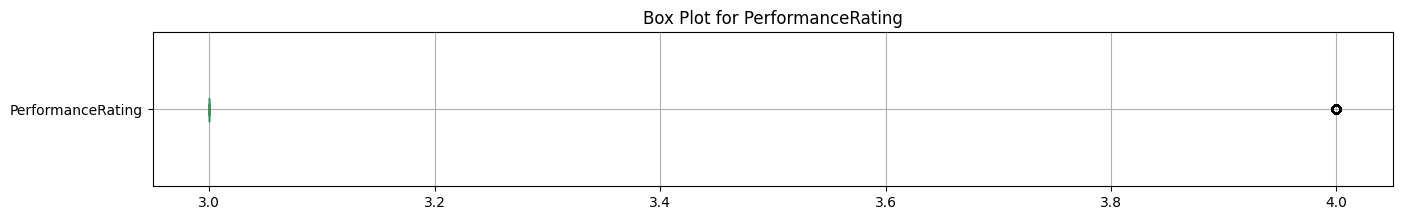

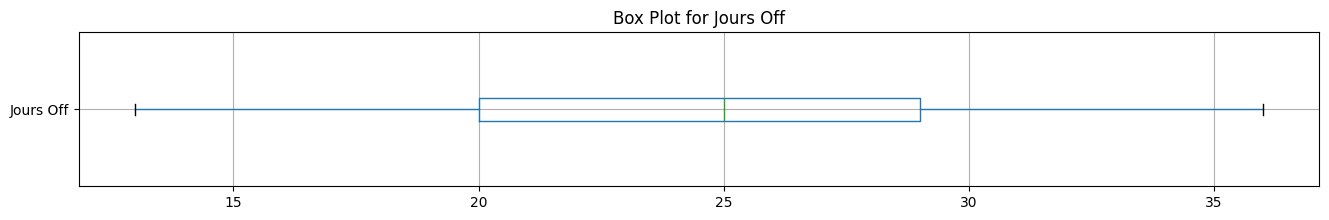

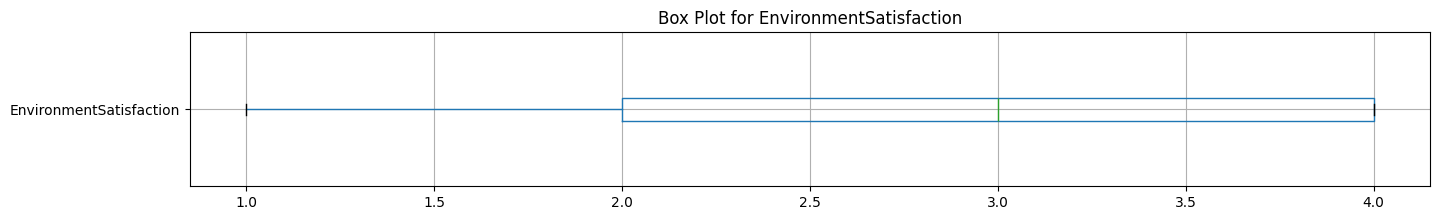

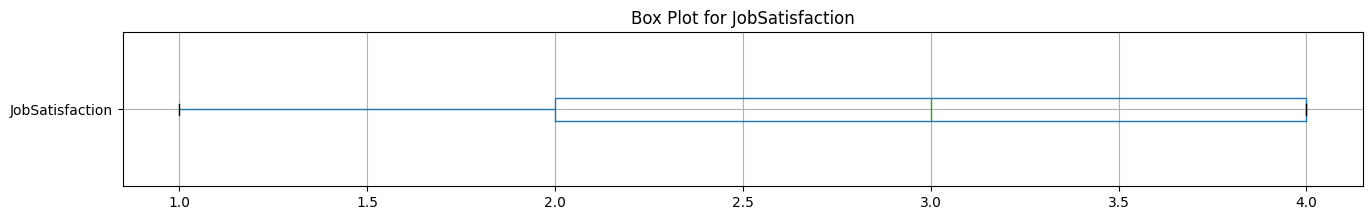

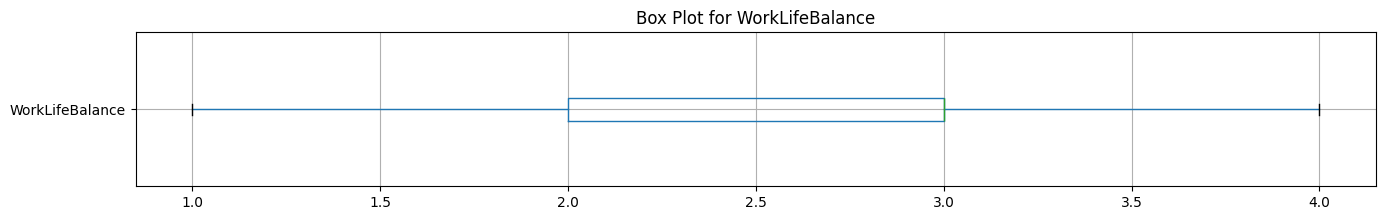

Age: 0 outliers (0.00%)
Attrition: 701 outliers (16.20%)
BusinessTravel: 1257 outliers (29.05%)
DistanceFromHome: 0 outliers (0.00%)
Education: 0 outliers (0.00%)
EmployeeID: 0 outliers (0.00%)
JobLevel: 0 outliers (0.00%)
MonthlyIncome: 332 outliers (7.67%)
NumCompaniesWorked: 154 outliers (3.56%)
PercentSalaryHike: 0 outliers (0.00%)
StockOptionLevel: 251 outliers (5.80%)
TotalWorkingYears: 186 outliers (4.30%)
TrainingTimesLastYear: 700 outliers (16.18%)
YearsAtCompany: 308 outliers (7.12%)
YearsSinceLastPromotion: 317 outliers (7.33%)
YearsWithCurrManager: 40 outliers (0.92%)
Department_Research & Development: 0 outliers (0.00%)
Department_Sales: 0 outliers (0.00%)
EducationField_Life Sciences: 0 outliers (0.00%)
EducationField_Marketing: 471 outliers (10.89%)
EducationField_Medical: 0 outliers (0.00%)
EducationField_Other: 239 outliers (5.52%)
EducationField_Technical Degree: 388 outliers (8.97%)
JobRole_Human Resources: 154 outliers (3.56%)
JobRole_Laboratory Technician: 760 outl

In [283]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate the IQR for each numeric column
Q1 = general_Msurvey_time_Esurvey_merged_clean.quantile(0.25)
Q3 = general_Msurvey_time_Esurvey_merged_clean.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Calculate the whiskers
lower_whisker = Q1 - threshold * IQR
upper_whisker = Q3 + threshold * IQR

# Create a box plot for each column and count outliers
outliers_count = {}

for column in general_Msurvey_time_Esurvey_merged_clean.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(16, 2))
    general_Msurvey_time_Esurvey_merged_clean.boxplot(column=column, vert=False, whis=threshold)
    plt.title(f'Box Plot for {column}')
    plt.show()
    
    # Count outliers
    lower_outliers = (general_Msurvey_time_Esurvey_merged_clean[column] < lower_whisker[column]).sum()
    upper_outliers = (general_Msurvey_time_Esurvey_merged_clean[column] > upper_whisker[column]).sum()
    outliers_count[column] = lower_outliers + upper_outliers

# Display the outliers count
for column, count in outliers_count.items():
    outlier_percentage = (count / general_Msurvey_time_Esurvey_merged_clean.shape[0]) * 100
    print(f'{column}: {count} outliers ({outlier_percentage:.2f}%)')
print(f"Number of rows in the dataset: {general_Msurvey_time_Esurvey_merged_clean.shape[0]}")



In [284]:
def Cap_value(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return column


def Years_Cat_transf_value(column):
    bins = [0, 2, 9, 14, 19, 40]
    labels = ['0-2', '3-9', '10-14', '15-19', '20-40']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)
    

def Days_Cat_transf_value(column):
    bins = [-1, 0, 2, 4, float('inf')]
    labels = ['0 days', '1-2 days', '3-4 days', '5+ days']
    column = pd.to_numeric(column, errors='coerce')
    return pd.cut(column, bins=bins, labels=labels, right=False)


general_Msurvey_time_Esurvey_merged_clean['TotalWorkingYears'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['TotalWorkingYears'])
general_Msurvey_time_Esurvey_merged_clean['YearsAtCompany'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['YearsAtCompany'])
general_Msurvey_time_Esurvey_merged_clean['YearsSinceLastPromotion'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['YearsSinceLastPromotion'])
general_Msurvey_time_Esurvey_merged_clean['YearsWithCurrManager'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['YearsWithCurrManager'])
general_Msurvey_time_Esurvey_merged_clean['TrainingTimesLastYear'] = Days_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['TrainingTimesLastYear'])
general_Msurvey_time_Esurvey_merged_clean['MonthlyIncome'] = Cap_value(general_Msurvey_time_Esurvey_merged_clean['MonthlyIncome'])
general_Msurvey_time_Esurvey_merged_clean['NumCompaniesWorked'] = Cap_value(general_Msurvey_time_Esurvey_merged_clean['NumCompaniesWorked'])

print(general_Msurvey_time_Esurvey_merged_clean[['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'MonthlyIncome', 'NumCompaniesWorked']])

     TotalWorkingYears YearsAtCompany YearsSinceLastPromotion  \
0                  0-2            0-2                     0-2   
1                  3-9            3-9                     0-2   
2                  3-9            3-9                     0-2   
3                10-14            3-9                     3-9   
4                10-14            3-9                     0-2   
...                ...            ...                     ...   
4404               3-9            3-9                     0-2   
4405             10-14            3-9                     0-2   
4406             10-14            3-9                     0-2   
4407               3-9            3-9                     0-2   
4408             10-14          10-14                     3-9   

     YearsWithCurrManager TrainingTimesLastYear  MonthlyIncome  \
0                     0-2               5+ days       131160.0   
1                     3-9              3-4 days        41890.0   
2                    

C:\Users\matv3\AppData\Local\Temp\ipykernel_29888\364569750.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_Msurvey_time_Esurvey_merged_clean['TotalWorkingYears'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['TotalWorkingYears'])
C:\Users\matv3\AppData\Local\Temp\ipykernel_29888\364569750.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_Msurvey_time_Esurvey_merged_clean['YearsAtCompany'] = Years_Cat_transf_value(general_Msurvey_time_Esurvey_merged_clean['YearsA

outliers -> pass to cat value so no more outliers
transform to order value so no more outliers